In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tfac.figures.figureCommon import getSetup
from tfac.Data_Mod import form_tensor
from tfac.tensor import partial_tucker_decomp, find_R2X_partialtucker
from tfac.figures.figure1 import proteinScatterPlot
from tfac.figures.figure2 import treatmentvsTimePlot

In [2]:
components = 7
tensor, treatments, times = form_tensor()
results = partial_tucker_decomp(tensor, [2], components)

In [3]:
from tfac.figures.figure4 import proteinBoxPlot

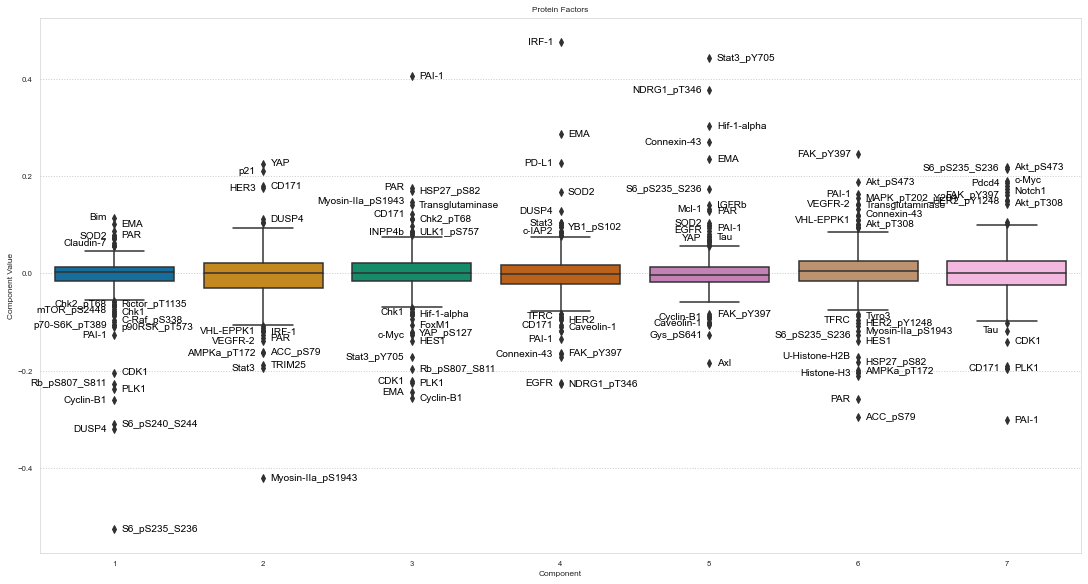

In [4]:
ax, f = getSetup((15, 8), (1, 1))

proteinBoxPlot(ax[0], results, components)

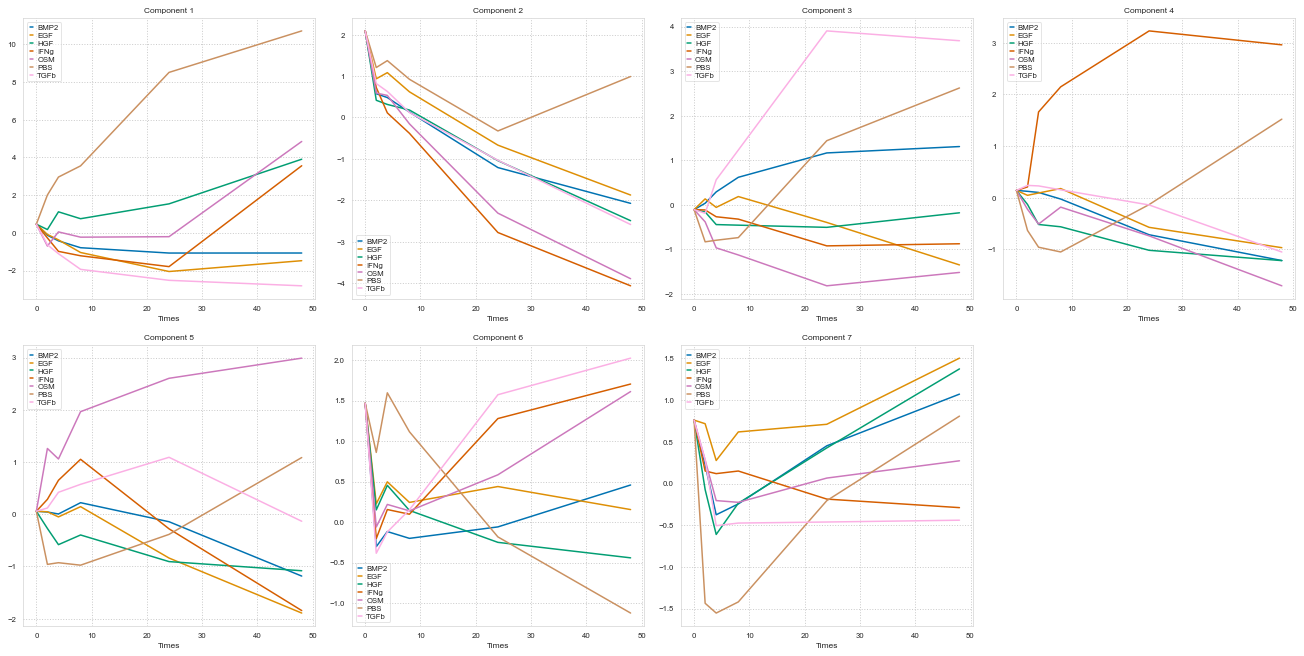

In [5]:
ax, f = getSetup((18, 9), (2, 4))
    
treatmentvsTimePlot(results, components, ax)

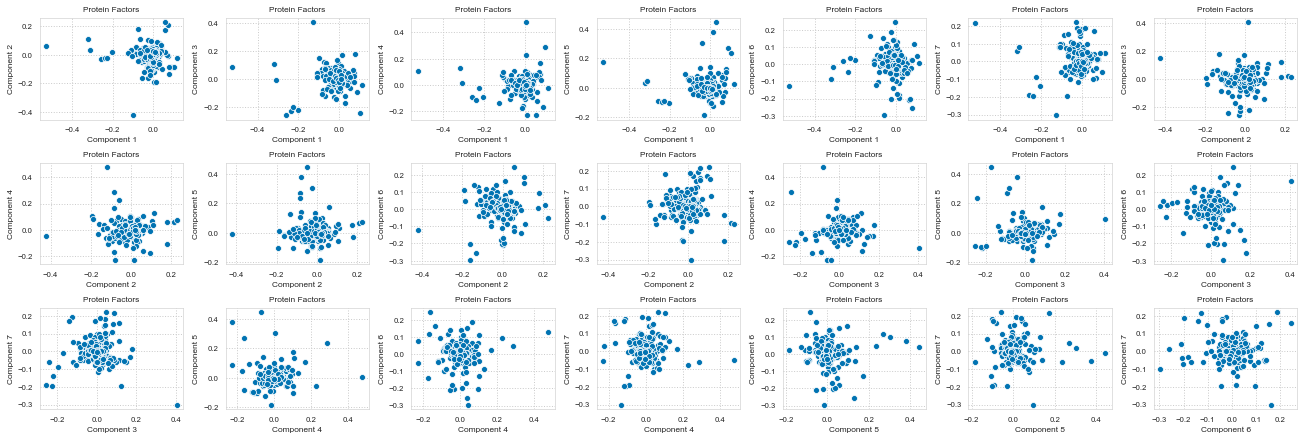

In [6]:
components = 7
tensor, treatments, times = form_tensor()
results = partial_tucker_decomp(tensor, [2], components)

a = 3
b = 7
ax, f = getSetup((18, 6), (a, b))


proteinScatterPlot(ax, results, components)

In [7]:
df = pd.DataFrame(results[1][0])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print("Component", str(i + 1), "1.5*IQR:", np.round((Q1[i] - 1.5*IQR[i]), 2), np.round((Q3[i] + 1.5*IQR[i]), 2))
    positives = []
    negatives = []
    for row, col in df.iterrows():
        if (col[i] < (Q1[i] - 1.5 * IQR[i])):
            negatives.append((col[i], col["Proteins"]))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
        elif (col[i] > (Q3[i] + 1.5 * IQR[i])):
            positives.append((col[i], col['Proteins']))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
    print()
    negatives = sorted(negatives)[:7]
    positives = sorted(positives)[-7:]
    for tup in positives:
        print(tup[1])
    for tup in positives:
        print(np.round(tup[0], 2))
    print()
    for tup in negatives:
        print(tup[1])
    for tup in negatives:
        print(np.round(tup[0], 2))
    print()
#display(prots)

Component 1 1.5*IQR: -0.06 0.06

p21-R-V
Caspase-7-cleaved-R-C
SOD2-R-V
PAR-R-C
Connexin-43-R-C
EMA-M-C
Bim-R-V
0.07
0.07
0.08
0.08
0.09
0.1
0.11

S6_pS235_S236-R-V
DUSP4-R-V
S6_pS240_S244-R-V
Cyclin-B1-R-V
PLK1-R-C
Rb_pS807_S811-R-V
CDK1-R-C
-0.53
-0.32
-0.31
-0.26
-0.24
-0.23
-0.2

Component 2 1.5*IQR: -0.11 0.1

Akt_pS473-R-V
MAPK_pT202_Y204-R-V
DUSP4-R-V
HER3-R-V
CD171-M-V
p21-R-V
YAP-R-C
0.1
0.11
0.11
0.18
0.18
0.21
0.23

Myosin-IIa_pS1943-R-V
Stat3-R-C
TRIM25-R-C
AMPKa_pT172-R-C
ACC_pS79-R-V
VEGFR-2-R-V
PAR-R-C
-0.42
-0.19
-0.19
-0.16
-0.16
-0.14
-0.13

Component 3 1.5*IQR: -0.07 0.08

Chk2_pT68-R-C
CD171-M-V
Transglutaminase-M-V
Myosin-IIa_pS1943-R-V
HSP27_pS82-R-V
PAR-R-C
PAI-1-M-V
0.11
0.12
0.14
0.15
0.17
0.18
0.41

Cyclin-B1-R-V
EMA-M-C
PLK1-R-C
CDK1-R-C
Rb_pS807_S811-R-V
Stat3_pY705-R-V
HES1-R-V
-0.26
-0.24
-0.23
-0.22
-0.2
-0.17
-0.14

Component 4 1.5*IQR: -0.08 0.08

Stat3-R-C
Mcl-1-R-V
DUSP4-R-V
SOD2-R-V
PD-L1-R-C
EMA-M-C
IRF-1-R-C
0.1
0.1
0.13
0.17
0.23
0.29
0.48

NDRG1_

In [8]:
from tfac.figures.figure3 import R2X_Figure_PartialTucker

In [9]:
components = 7
tensor, treatments, times = form_tensor()
results = partial_tucker_decomp(tensor, [2], components)

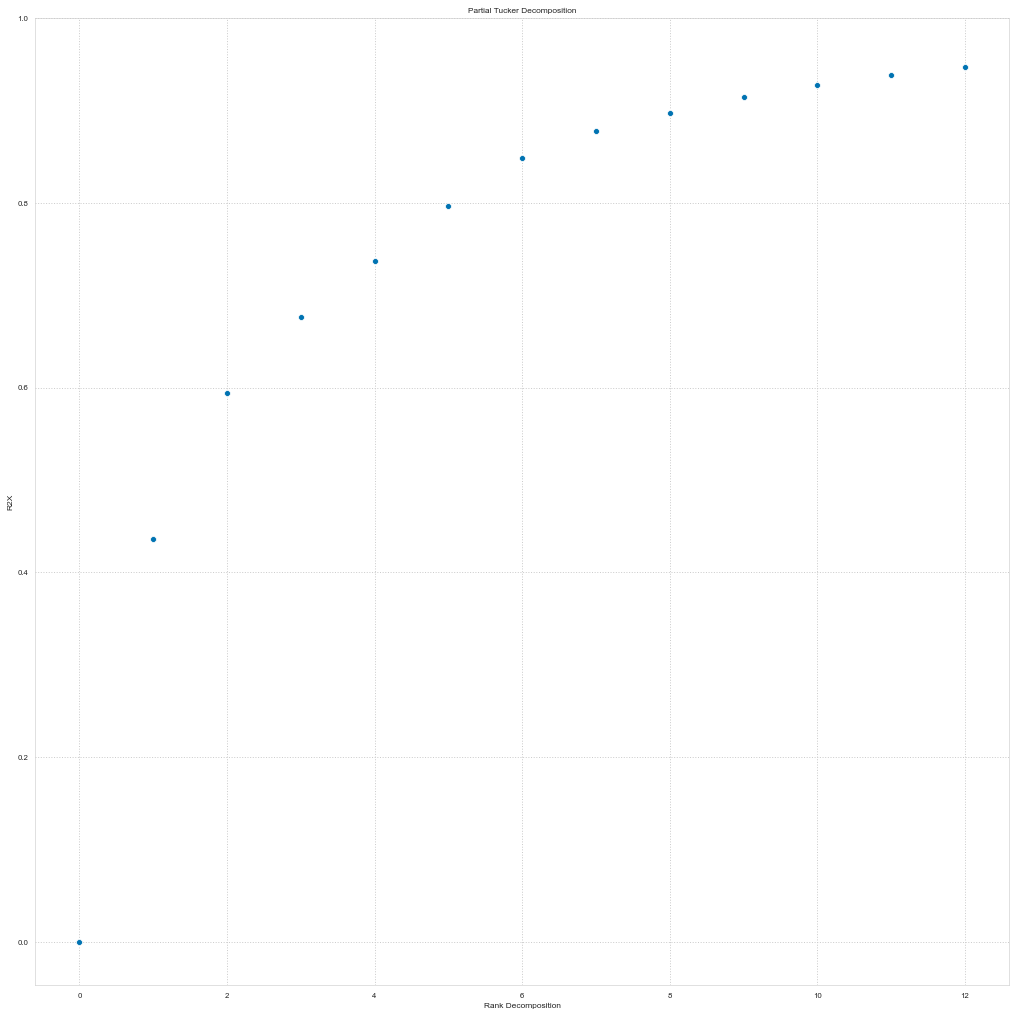

In [10]:
ax, f = getSetup((14, 14), (1, 1))

R2X_Figure_PartialTucker(ax[0], tensor)

## 